<a href="https://colab.research.google.com/github/Suchandra21/Fake-news-detection-using-ML/blob/main/final_fake_news_prediction_using_ML_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip uninstall scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/scikit_learn-1.2.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.11/dist-packages/sklearn/*
Proceed (Y/n)? y
  Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip install scikit-learn==1.2.2

  Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [ ]:
!pip install joblib==1.4.2

In [ ]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
  inflating: fake_and_real_news.csv  


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Step 1: Load Dataset
df = pd.read_csv('/content/fake_and_real_news.csv')  # Update the path as needed
X = df['Text'].iloc[:5000]
y = df['label'].iloc[:5000]

In [ ]:
X.shape

(5000,)

In [ ]:
df

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real
...,...,...
9895,Wikileaks Admits To Screwing Up IMMENSELY Wit...,Fake
9896,Trump consults Republican senators on Fed chie...,Real
9897,Trump lawyers say judge lacks jurisdiction for...,Real
9898,WATCH: Right-Wing Pastor Falsely Credits Trum...,Fake


In [ ]:
# Step 2: Data Preprocessing
nltk.download('stopwords')
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text):
    review = re.sub('[^a-zA-Z]', ' ', text)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stopwords.words('english')]
    return ' '.join(review)


In [ ]:
X = X.apply(preprocess_text)

In [ ]:
# Step 3: Vectorize Text Data
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00       515
        Real       1.00      1.00      1.00       485

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



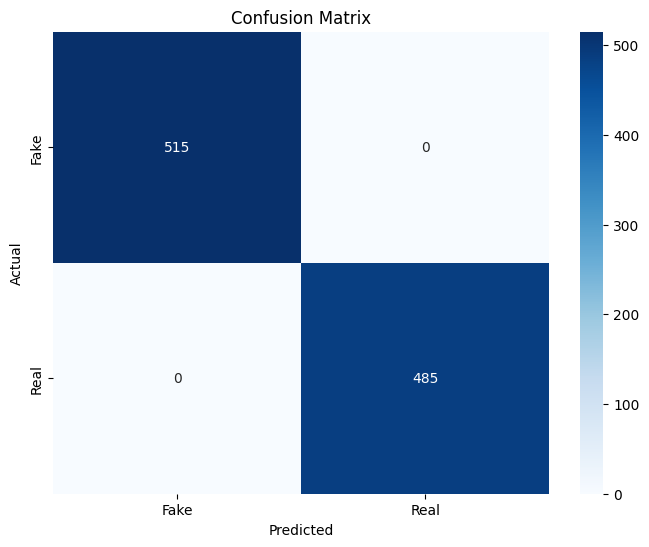

In [ ]:
# Step 6: Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Step 9: Prediction Function
def predict_fake_news(text):
    text = preprocess_text(text)
    text_vectorized = tfidf.transform([text])
    prediction = model.predict(text_vectorized)
    return "Real News" if prediction[0] == 'Real' else "Fake News"

# Test the function
sample_text = "Fatal Niger operation sparks calls for public hearings in Congress WASHINGTON (Reuters) - Democratic U.S. lawmakers called on Thursday for public hearings on an attack in Niger that killed four U.S. soldiers, saying there were still many unanswered questions about the ambush despite receiving more information from the Pentagon. Two top Department of Defense officials, Robert Karem, assistant secretary for international security affairs, and Major General Albert Elton, deputy director for special operations and counterterrorism, conducted a closed briefing on the ambush for members of the Senate Armed Services Committee. Senator John McCain, the Republican chairman of the committee, said he was pleased with the briefing. McCain last week threatened to issue a subpoena because the White House had not been forthcoming about details about the attack. â€œI am pleased at the cooperation weâ€™re getting now,â€ McCain told reporters. McCain said there were still many unanswered questions, most notably why it took 48 hours before the body of Sargent La David Johnson was recovered. â€œWhat was the strategy; why were we surprised? Thereâ€™s 100 questions that need to be answered,â€ McCain said. The issue has also generated a political firestorm. President Donald Trump was harshly criticized for his handling of a call with Myeshia Johnson, Johnsonâ€™s widow, who said the Republican president â€œmade me cry even worseâ€ by saying her husband had known â€œwhat he signed up for.â€ Senator Richard Blumenthal, a Democratic committee member, said he wanted public hearings on the matter to explain to the U.S. public why the country has 6,000 troops posted in Africa and provide more information about the ambush. â€œI need to be able to look families in the eye and explain what our mission is, what mistakes were made in this incident, and were mistakes made, who made them and why,â€ Blumenthal told reporters after the briefing. â€œMost important, there need to be public hearings,â€ he said. McCain said he would decide whether to hold public hearings depending on what happened with the militaryâ€™s investigation, citing security concerns about making anything public too soon. â€œWe canâ€™t betray sensitive information that would put the lives of these men and women in danger,â€ McCain said. On Monday, General Joseph Dunford, the chairman of the militaryâ€™s Joint Chiefs of Staff, held an hour-long news conference during which he sought to tamp down criticism that the Pentagon had released too little information about the deaths of the soldiers. [L2N1MY1MD] "
print(predict_fake_news(sample_text))

Real News


In [ ]:
import joblib
joblib.dump(model, 'fake_news_model.joblib')

['fake_news_model.joblib']

In [ ]:
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']